<center> </center>

<center><font size=5 face="Helvetica" color=#306998><b>
MPB Tutorial: Bandstructure of Photonic Crystal Slabs
</b></font></center>

<center><font face="Helvetica" size=3><b>Ang Chen</b></font></center>
<center><font face="Helvetica" size=3>January, 2025</font></center>

***

In [73]:
import matplotlib.pyplot as plt
import numpy as np

import meep as mp
from meep import mpb

# rc('text', usetex=True)
plt.rcParams["font.family"] = "Helvetica"
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [74]:
num_bands = 2

k_points_Gamma2X = [
    mp.Vector3(0,0,0),          # Gamma
    mp.Vector3(0.5,0,0),  # X
]

k_points_M2Gamma = [
    mp.Vector3(0.5, 0.5,0),  # M
    mp.Vector3(0,0,0),          # Gamma
]

num_k = 30
k_points_Gamma2X = mp.interpolate(num_k, k_points_Gamma2X)
k_points_M2Gamma = mp.interpolate(int(num_k*np.sqrt(2)), k_points_M2Gamma)

k_points = k_points_M2Gamma[:-1] + k_points_Gamma2X

In [75]:
resolution = 20  # pixels/a

a = 0.336 # units of um
r = 0.080 # units of um
h = 0.180 # units of um

r = r/a  # units of "a"
h = h/a  # units of "a"

n_Si3N4 = 2.02
n_SiO2 = 1.46

Si3N4 = mp.Medium(index=n_Si3N4)
SiO2 = mp.Medium(index=n_SiO2)

In [76]:
geometry_lattice = mp.Lattice(
    size=mp.Vector3(1, 1, 4),
)

geometry = [
    mp.Block(
        center=mp.Vector3(),
        size=mp.Vector3(mp.inf, mp.inf, h),
        material=Si3N4,
    ),
    mp.Cylinder(
        center=mp.Vector3(),
        radius=r, 
        height=h,
        material=SiO2, 
    ),
]

In [77]:
ms = mpb.ModeSolver(
    geometry_lattice=geometry_lattice,
    geometry=geometry,
    resolution=resolution,
    num_bands=num_bands,
    k_points=k_points,
    default_material=SiO2,
)

In [78]:
ms.run_zeven()
even_freqs = ms.all_freqs

ms.run_zodd()
odd_freqs = ms.all_freqs

Initializing eigensolver data
Computing 2 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 20 x 20 x 80.
Solving for 2 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 4)
Cell volume = 4
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 0.25)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1e+20,0.535714)
          axes (1,0,0), (0,1,0), (0,0,1)
     cylinder, center = (0,0,0)
          radius 0.238095, height 0.535714, axis (0, 0, 1)
Geometric object tree has depth 1 and 10 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: zeven.
Initializing fields to random numbers...
75 k-points
  Vector3<0.5, 0.5, 0.0>
  Vector3<0.4883720930232558, 0.4883720930232558, 0.0>
  Vector3<0.47674418604651164, 0.47674418604651164, 0.0>
  Vector3<0.46511627906976744, 0.46511627906976744, 0.0>
  Vect

In [79]:
x = range(len(odd_freqs))
k_parallel = np.zeros(len(k_points))
gamma_index = round(np.sqrt(2)/(np.sqrt(2)+1)*len(k_points))
k_parallel[:gamma_index] = np.linspace(np.sqrt(2)/2, 0, gamma_index)
k_parallel[gamma_index-1:] = np.linspace(0, 1/2, len(k_points)-gamma_index+1)

len(k_points)

75

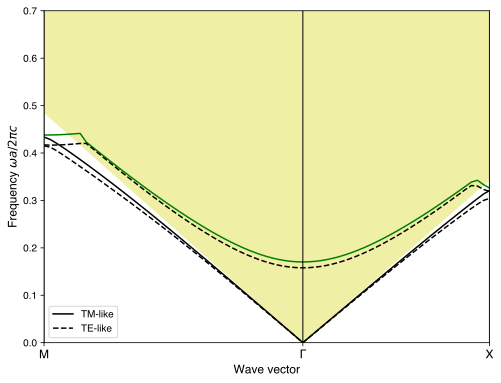

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

x = range(len(odd_freqs))
## Plot method 0
for i in range(odd_freqs.shape[1]):
    if i==0:
        ax.plot(x, odd_freqs[:,i], color='k', linestyle='-', lw=1.5, label='TM-like')
        ax.plot(x, even_freqs[:,i], color='k', linestyle='--', lw=1.5, label='TE-like')
    elif i==1:
        ax.plot(x, odd_freqs[:,i], color='g', linestyle='-', lw=1.5)
        ax.plot(x, even_freqs[:,i], color='k', linestyle='--', lw=1.5)
    else:
        ax.plot(x, odd_freqs[:,i], color='k', linestyle='-', lw=1.5)
        ax.plot(x, even_freqs[:,i], color='k', linestyle='--', lw=1.5)

## Plot method 1
# ax.plot(x, odd_freqs, color='b', linestyle='-', lw=1.5)
# ax.plot(x, even_freqs, color='r', linestyle='-',lw=1.5)

## Plot method 2
# ax.plot(x, odd_freqs, 'o', color='b', markerfacecolor="none", ms=3)
# ax.plot(x, even_freqs, 'o',color='r', markerfacecolor="none", ms=3)

## Plot method 3
# for xz, oddz, evenz in zip(x, odd_freqs, even_freqs):
#     ax.scatter([xz] * len(oddz), oddz, color="blue", facecolors="none", s=8)
#     ax.scatter([xz] * len(evenz), evenz, color="red", facecolors="none", s=8)

ax.fill_between(x, k_parallel/n_SiO2, 0.7, facecolor='#F0EFA6', alpha=1)

ax.set_ylim([0, .7])
ax.set_xlim([x[0], x[-1]])

tick_locs = [0, len(k_points_M2Gamma) - 1, len(k_points) - 1]
tick_labs = ["M", r"$\Gamma$", "X"]
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=12)
ax.set_xlabel("Wave vector", size=12)
ax.set_ylabel(r"Frequency $\omega a/2\pi c$", size=12)
# ax.grid(True, color="black", linestyle="--", alpha=0.5)
for x in tick_locs:
    ax.axvline(x, color="#000000", lw=1)

ax.legend(loc=3)
# ax.text(22, 0.05, "TM-like", color="blue")
# ax.text(22, 0.01, "TE-like", color="red")

plt.show()